# Lime

LIME (Local Interpretable Model-agnostic Explanations) is a local explanation method introduced by Ribeiro et al. \[LIME\]. More precisely, LIME is a Feature attribution method which means that the method computes for each feature of an input sample its importance in the prediction. To do so, LIME uses perturbations of the considered sample and their corresponding (and perturbated) predictions to identify features of importance. One of the advantages of such a black-box method is that it does not need to have access to the inner working of the model but only to its input(s) and output(s).

The key idea of LIME is to *mask* some features and to consider these features as of importance if such perturbation(s) also strongly modifies the prediction. To be exhaustive, the method should consider each and every combination of features which not achievable in practice. To alleviate this issue, the authors proposed to first segment the image into groups of features (in case of an image sample, into superpixels) and then to use these groups of features instead of a individual features when computing the masks. Even if it drastically reduces the number of possible combinations, the number of combinations of groups of features is still too large to be considered. A surrogate model is trained to predict the perturbation (in term of prediction of the initial model) from a vector representation of the perturbated sample. The surrogate model is finally used to determine the combination of groups of features that deteriorate the most the prediction of the initial model. 

In the next, you will find a source code for loading a model (pre-trained on Imagenet), an image (from Imagenet) and to execute LIME. The main objective of this session is to manipulate the various parameters of the method and try to identify a good parameter setting.

\[LIME\] Ribeiro, M. T., Singh, S., & Guestrin, C. (2016, August). " Why should i trust you?" Explaining the predictions of any classifier. In Proceedings of the 22nd ACM SIGKDD international conference on knowledge discovery and data mining (pp. 1135-1144)

## Import a pre-trained model, explain with Lime

The following cells provide source code for loading a model, here Xception, pre-trained on Imagenet dataset.

### Import a pre-trained Xception model 

In [4]:
import numpy as np
import tensorflow as tf

model_builder = tf.keras.applications.xception.Xception
preprocess_input = tf.keras.applications.xception.preprocess_input
decode_predictions = tf.keras.applications.xception.decode_predictions
model = model_builder(weights="imagenet", classifier_activation="softmax")

# expected input size for Xception
img_size = (299, 299)


### Load an image

In [6]:
import matplotlib.pyplot as plt


def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return preprocess_input(array)

### Model prediction

In [8]:

def make_prediction(model, img_array):
    preds = model.predict(img_array).flatten()
    pred_index = np.argmax(preds)  # we will explain for this specific class
    labels = decode_predictions(np.asarray([preds]), top=3)[0]
    labels = [[label[1], label[2]] for label in labels]    
    
    return preds, pred_index, labels

### Lime Explanation

**Create a Lime explanation** 

In [11]:
# Generate saliency with LIME algorithm

from lime import lime_image

def get_lime_explanation(img_array, pred_index, top_labels, hide_color, num_lime_features, num_samples):
    explainer = lime_image.LimeImageExplainer(random_state=0) # for reproductibility

    explanation = explainer.explain_instance(
        img_array,
        model.predict,
        top_labels=top_labels,
        labels=(pred_index,),
        hide_color=hide_color,
        num_features=num_lime_features,
        num_samples=num_samples,
        random_seed = 0) # for reproductibility
    
    return explanation

**Display the explanation**

In [13]:
from skimage.segmentation import mark_boundaries


def explain_with_lime(img_path, 
                      top_labels, hide_color, num_lime_features, num_samples, # Explanation parameters
                      positive_only, negative_only, num_superpixels, hide_rest,# Rendering parameters
                      model):

    img_array = get_img_array(img_path, size=img_size)
    
    _, pred_index, labels = make_prediction(model,img_array)
    
    print("Top-3 predicted classes : ")
    for l in labels:
        print("\t"+l[0]+": "+str(l[1]))


    #Display the image
    plt.imshow(img_array[0] /2 +0.5) #for rendering because of preprocessin of Xception
    plt.axis('off')
    plt.show()

    explanation = get_lime_explanation(img_array[0],
                                        pred_index, top_labels, hide_color, num_lime_features, num_samples)

    temp, mask = explanation.get_image_and_mask(pred_index, 
                                                positive_only=positive_only, negative_only=negative_only, num_features=num_superpixels, hide_rest=hide_rest)

    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.axis('off')  
    plt.show()


### Main code to execute

Bellow you can find the code to choose the image file, set all parameters considered here and compute the explanation of the model prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step
Top-3 predicted classes : 
	African_elephant: 0.5350221
	tusker: 0.2796558
	Indian_elephant: 0.09170991


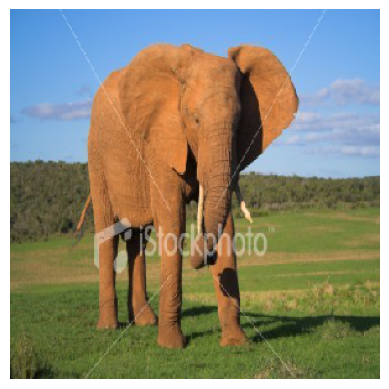

  0%|          | 0/5000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

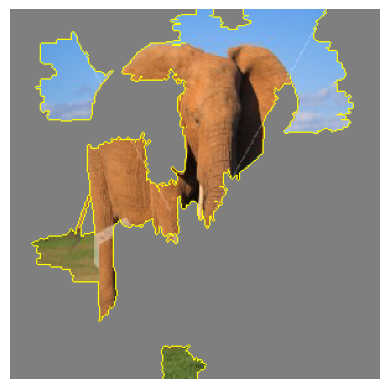

In [15]:
# set the image whose prediction is to be explained 
img_path = "./data/African_elephant/ILSVRC2012_val_00048781.JPEG"

# Explanation parameters
top_labels        = 1 # Use top-k labels or not
hide_color        = [0,0,0] # RGB color or None (average color of superpixels is used) used to generate neighboring samples
num_lime_features = 100000 # size in number of groups of features of an explanation
num_samples       = 5000 # number of perturbated samples to generate

# Rendering parameters
positive_only   = True # display only features having a positive impact on the prediction
negative_only   = False # display only features having a negative impact on the prediction
num_superpixels = 15 # number of superpixels to display
hide_rest       = True # hide the rest of the picture or not

explain_with_lime(img_path, 
                  top_labels, hide_color, num_lime_features, num_samples,
                  positive_only, negative_only, num_superpixels, hide_rest,
                 model)

## Exercise

### Question 1
As you can see in the previous cell, many parameters have to be set manually according to the model and data. Try to identify a right combination of parameters to explain the prediction of the given image (here an african elephant). Try different values for the parameters and show which combination of the values produces the better explanation visually.

### Question 2
Now consider another image of african elephan (see "./data/African_elephant/"). Is your parameter setting stil appropriate? How does the output look different now?

### Question 3
We now consider images from another class to assess whether the identified setting is appropriate for another class. You can find a black bear images here: "./data/black_bear/"

What can you conclude? 

### Question 4
Here, we want to answer the following question: If we change the model, would the parameter setting still be appropriate? In other words, is the parameter setting more related to the data and tasks than it is to the model architecture?

1. Below, you can find the source code for loading a pre-trained Resnet model. Try to explain its prediction with LIME and to identify a good parameter setting.

2. What can you conclude?


# Question 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Top-3 predicted classes : 
	African_elephant: 0.5350221
	tusker: 0.2796558
	Indian_elephant: 0.09170991


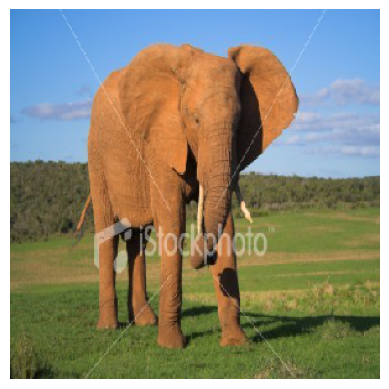

  0%|          | 0/5000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

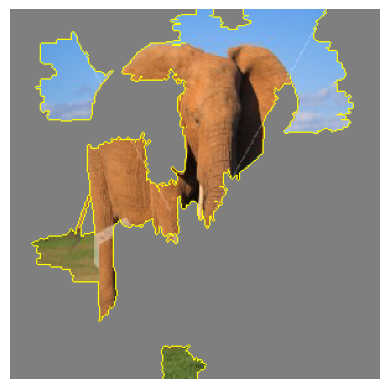

In [18]:
top_labels= 3
explain_with_lime(img_path, 
                  top_labels, hide_color, num_lime_features, num_samples,
                  positive_only, negative_only, num_superpixels, hide_rest,
                 model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Top-3 predicted classes : 
	African_elephant: 0.5350221
	tusker: 0.2796558
	Indian_elephant: 0.09170991


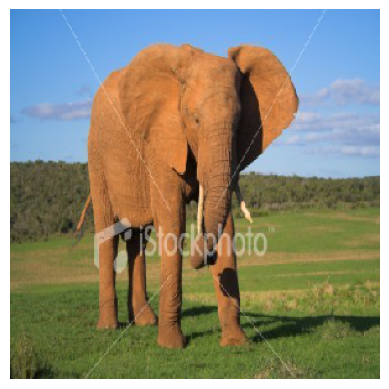

  0%|          | 0/5000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

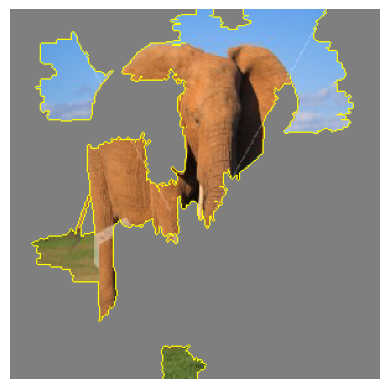

In [19]:
top_labels= 1
num_lime_features = 200000

explain_with_lime(img_path, 
                  top_labels, hide_color, num_lime_features, num_samples,
                  positive_only, negative_only, num_superpixels, hide_rest,
                 model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Top-3 predicted classes : 
	African_elephant: 0.5350221
	tusker: 0.2796558
	Indian_elephant: 0.09170991


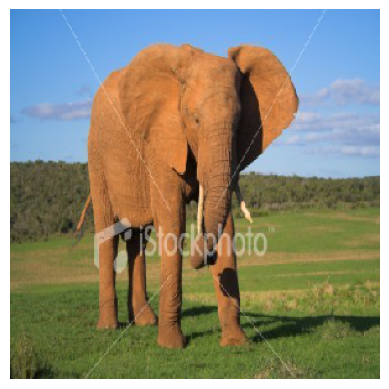

  0%|          | 0/5000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

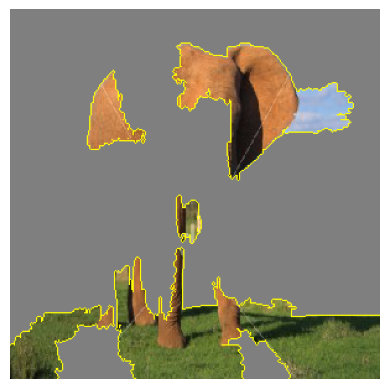

In [20]:
hide_color = None
num_lime_features = 100000

explain_with_lime(img_path, 
                  top_labels, hide_color, num_lime_features, num_samples,
                  positive_only, negative_only, num_superpixels, hide_rest,
                 model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Top-3 predicted classes : 
	African_elephant: 0.5350221
	tusker: 0.2796558
	Indian_elephant: 0.09170991


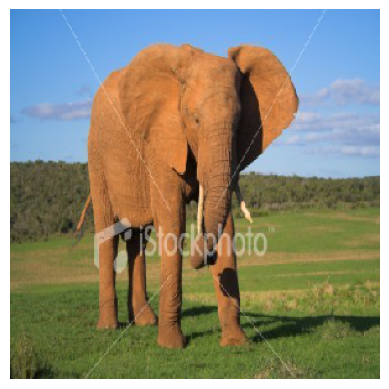

  0%|          | 0/500 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 76s 76s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1

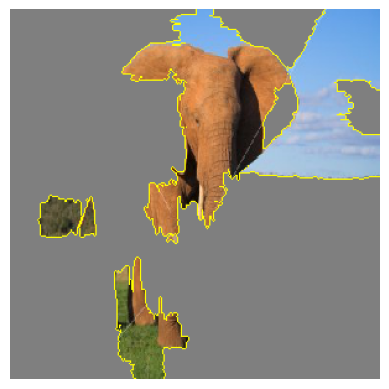

In [21]:
hide_color = [0,0,0]
num_samples       = 500 

explain_with_lime(img_path, 
                  top_labels, hide_color, num_lime_features, num_samples,
                  positive_only, negative_only, num_superpixels, hide_rest,
                 model)

# Question 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Top-3 predicted classes : 
	Indian_elephant: 0.71186334
	tusker: 0.08865668
	African_elephant: 0.083686076


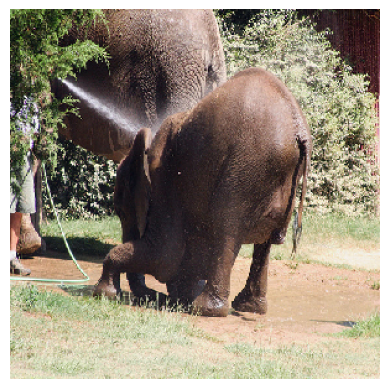

  0%|          | 0/5000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1063s 1063s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 42s 42s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
1/1 ━━━━━━━━━━━━━━━━━━━

In [ ]:
new_elephant = "./data/African_elephant/ILSVRC2012_val_00039678.JPEG"

param_setting = {
    'top_labels': 3,
    'hide_color': [0,0,0],
    'num_lime_features': 100000,
    'num_samples': 5000,
    'positive_only': True,
    'negative_only': False,
    'num_superpixels': 15,
    'hide_rest': True,
    'model': model
}

explain_with_lime(new_elephant, **param_setting)


Je remarque que mes paramètres ne sont plus adaptés, car LIME a du mal à délimiter l'éléphant. Il y a trop de pixels mis en évidence, rendant l'identification de l'animal difficile. Cela suggère qu'il faudrait ajuster les paramètres pour obtenir une explication plus précise.

# Question 3

In [ ]:
new_bear = "./data/black_bear/ILSVRC2012_val_00014576.JPEG"

param_setting = {
    'top_labels': 3,
    'hide_color': [0,0,0],
    'num_lime_features': 100000,
    'num_samples': 5000,
    'positive_only': True,
    'negative_only': False,
    'num_superpixels': 15,
    'hide_rest': True,
    'model' : model
}

explain_with_lime(new_bear, **param_setting)


Je conclus que les hyperparamètres doivent être choisis en fonction de l'image. LIME a montré que les réglages précédents ne fournissent pas des explications pertinentes pour les images d'ours noirs, indiquant que les caractéristiques visuelles varient d'une classe à l'autre.

# Question 4

In [ ]:
import numpy as np
import tensorflow as tf

model_builder = tf.keras.applications.resnet_v2.ResNet50V2
preprocess_input = tf.keras.applications.resnet_v2.preprocess_input
decode_predictions = tf.keras.applications.resnet_v2.decode_predictions
model = model_builder(weights="imagenet", classifier_activation="softmax")

# expected input size for ResNet50
img_size = (224,224)

# Set the path of the image (African elephant or black bear)
img_path = "./data/African_elephant/ILSVRC2012_val_00048781.JPEG" 



In [ ]:
def best_parameter_setting(img_path, model, top_labels, hide_color, num_lime_features, num_samples, positive_only, negative_only, num_superpixels, hide_rest):
    img_array = get_img_array(img_path, size=img_size)
    _, pred_index, labels = make_prediction(model, img_array)
    print("Top-3 predicted classes:")
    for label in labels:
        print(f"\t{label[0]}: {label[1]:.4f}")

    best_params = None
    best_acc = 0

    for top_label in top_labels:
        for num_lime_feature in num_lime_features:
            for num_sample in num_samples:
                for p_only in positive_only:
                    for n_only in negative_only:
                        for num_superpixel in num_superpixels:
                            for h_rest in hide_rest:
                                img_array = get_img_array(img_path, size=img_size)
                                _, pred_index, labels = make_prediction(model, img_array)
                                explanation = get_lime_explanation(
                                    img_array[0],
                                    pred_index,
                                    top_label,
                                    hide_color,
                                    num_lime_feature,
                                    num_sample
                                )

                                temp, mask = explanation.get_image_and_mask(
                                    pred_index,
                                    positive_only=p_only,
                                    negative_only=n_only,
                                    num_features=num_superpixel,
                                    hide_rest=h_rest
                                )

                                image_mask = mark_boundaries(temp / 2 + 0.5, mask)
                                array = tf.keras.preprocessing.image.img_to_array(image_mask)
                                array = np.expand_dims(array, axis=0)
                                array =  preprocess_input(array)
                                _, pred_index, labels = make_prediction(model, array)
                                
                                for label in labels:
                                    #print(f"\t{label[0]}: {label[1]:.4f}")
                                    if label[1] > best_acc and label[0] == 'African_elephant':
                                        best_acc = label[1]
                                        best_params = {
                                            'top_labels': top_label,
                                            'hide_color': hide_color,
                                            'num_lime_features': num_lime_feature,
                                            'num_samples': num_sample,
                                            'positive_only': p_only,
                                            'negative_only': n_only,
                                            'num_superpixels': num_superpixel,
                                            'hide_rest': h_rest
                                            }
                                        print("Best prediction :", best_acc )

                                        print(f"\nBest parameter setting:\n{best_params}")
                                        plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
                                        plt.axis('off')
                                        plt.show()


    

In [ ]:
# Define the explanation parameters to test
top_labels = [1, 3]
hide_color = [0, 0, 0]
num_lime_features = [1000, 10000, 50000]
num_samples = [10, 1000, 5000]
positive_only = [True, False]
negative_only = [False, False]
num_superpixels = [5, 10]
hide_rest = [True, False]

# Load the image to test
img_path = "./data/African_elephant/ILSVRC2012_val_00048781.JPEG"

# Test the best_parameter_setting function
best_params = best_parameter_setting(
    img_path,
    model,
    top_labels,
    hide_color,
    num_lime_features,
    num_samples,
    positive_only,
    negative_only,
    num_superpixels,
    hide_rest
)

In [ ]:
print(f"\nBest parameter setting found: {best_params}")

Je conclus que trouver les bons paramètres est un processus long et délicat. Les réglages peuvent varier considérablement d'un modèle à l'autre, soulignant l'importance d'adapter les hyperparamètres en fonction du modèle et des données.